In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
def model(x, a, x0, tau_p, b):
    return np.real(a * np.exp(-2. * np.log(2.) * (x-x0) ** 2 / tau_p ** 2 + b * 1j * (x-x0) ** 2))

In [23]:
np.random.seed(12345)
x = np.linspace(0, 10, 500)
p = (2., 0.5, 5., 3.)
y = model(x, *p)
s = 0.1 * np.ones_like(x)
n = s * np.random.normal(size=s.size)
yn = y + n

In [30]:
popt, pcov = optimize.curve_fit(model, x, yn)
popt, pcov

(array([2.00348614, 0.49981811, 5.00040113, 3.0020764 ]),
 array([[ 1.39696877e-04, -8.46442940e-08, -2.33471207e-04,
         -1.04304941e-07],
        [-8.46442940e-08,  1.52609640e-06, -1.73504955e-06,
          2.29711921e-06],
        [-2.33471207e-04, -1.73504955e-06,  1.66959079e-03,
         -2.64952095e-06],
        [-1.04304941e-07,  2.29711921e-06, -2.64952095e-06,
          4.08571273e-06]]))

In [28]:
yhat = model(x, *popt)

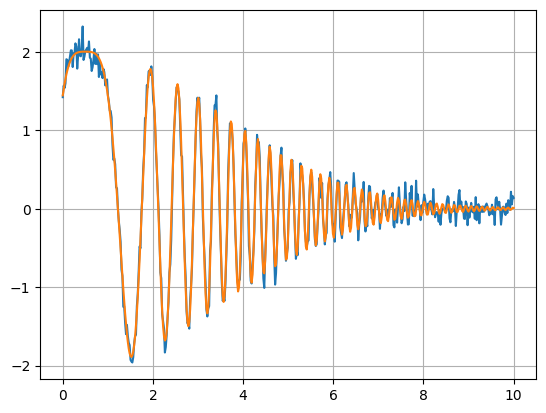

In [29]:
fig, axe = plt.subplots()
axe.plot(x, yn)
axe.plot(x, yhat)
axe.grid()